In [16]:
import pandas as pd 
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
books_data = pd.read_csv(r'C:\Users\camwa\Downloads\best-selling-books.csv')
books_data.head()


,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,Novella
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,Fantasy
3,And Then There Were None,Agatha Christie,English,1939,100.0,Mystery
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,Family saga


In [3]:
books_data['Genre'].unique()

array(['Historical fiction', 'Novella', 'Fantasy', 'Mystery',
       'Family saga', "Fantasy, Children's fiction", 'Adventure',
       'Detective', 'Mystery thriller', 'Coming-of-age', 'Romance',
       'Self-help', 'Magic realism', 'Novel', "Children's fiction",
       'Manual', "Children's novel", "Children's literature",
       'Historical novel, mystery', 'War, thriller', 'Sexology',
       "Children's Literature", 'Novella, Self-help',
       "Children's Literature, picture book", 'Essay/Literature',
       'Southern Gothic, Bildungsroman', 'Gothic horror, Family saga',
       'Popular science, Anthropology, Astrophysics, Cosmology, Philosophy, History',
       'Philosophical novel, Young adult', 'Mystery-thriller',
       'Socialist realist novel', 'Historical novel',
       'Historical non-fiction, Autobiography, Memoir, Bildungsroman / Coming of Age, Jewish literature',
       'Romantic family saga', 'Christian literature',
       'Bildungsroman, Historical fiction', 'Novel, tr

In [4]:
genre_mapping = {
    'Historical fiction': 'Historical & Period-based',
    'Novella': 'Literature & Fiction',
    'Fantasy': 'Fantasy & Speculative',
    'Mystery': 'Mystery & Thriller',
    'Family saga': 'Horror',
    "Fantasy, Children's fiction": 'Fantasy & Speculative',
    'Adventure': 'Adventure & Action',
    'Detective': 'Mystery & Thriller',
    'Mystery thriller': 'Mystery & Thriller',
    'Coming-of-age': 'Young Adult & Coming-of-Age',
    'Romance': 'Romance & Relationships',
    'Self-help': 'Self-Help',
    'Magic realism': 'Literature & Fiction',
    'Novel': 'Literature & Fiction',
    "Children's fiction": 'Children & Juvenile',
    'Manual': 'Specialized & Specific Topics',
    "Children's novel": 'Children & Juvenile',
    "Children's literature": 'Children & Juvenile',
    'Historical novel, mystery': 'Historical & Period-based',
    'War, thriller': 'Mystery & Thriller',
    'Sexology': 'Specialized & Specific Topics',
    "Children's Literature": 'Children & Juvenile',
    'Novella, Self-help': 'Self-Help',
    "Children's Literature, picture book": 'Children & Juvenile',
    'Essay/Literature': 'Literature & Fiction',
    'Southern Gothic, Bildungsroman': 'Literature & Fiction',
    'Gothic horror, Family saga': 'Horror',
    'Popular science, Anthropology, Astrophysics, Cosmology, Philosophy, History': 'Specialized & Specific Topics',
    'Philosophical novel, Young adult': 'Young Adult & Coming-of-Age',
    'Mystery-thriller': 'Mystery & Thriller',
    'Socialist realist novel': 'Literature & Fiction',
    'Historical novel': 'Historical & Period-based',
    'Historical non-fiction, Autobiography, Memoir, Bildungsroman / Coming of Age, Jewish literature': 'Historical & Period-based',
    'Romantic family saga': 'Romance & Relationships',
    'Christian literature': 'Religion & Spirituality',
    'Bildungsroman, Historical fiction': 'Historical & Period-based',
    'Novel, tragedy': 'Literature & Fiction',
    'Gothic novel': 'Literature & Fiction',
    'Dystopian, political fiction, social science fiction': 'Fantasy & Speculative',
    'Fiction': 'Literature & Fiction',
    'Young adult fiction': 'Young Adult & Coming-of-Age',
    'Young adult historical novel': 'Young Adult & Coming-of-Age',
    'Self-help, motivational, business fable, psychology, leadership, parable': 'Self-Help',
    'Popular science': 'Specialized & Specific Topics',
    'Biographical novel': 'Biographies & Memoirs',
    'New-age spiritual novel': 'Religion & Spirituality',
    'Young adult romantic novel': 'Young Adult & Coming-of-Age',
    'Thriller': 'Mystery & Thriller',
    'Crime novel': 'Mystery & Thriller',
    'Romance novel': 'Romance & Relationships',
    'Young Adult novel, adventure, dystopian, science fiction': 'Fantasy & Speculative',
    'Young Adult novel, adventure, war, science fiction, action thriller': 'Fantasy & Speculative',
    'Japanese novel': 'Literature & Fiction',
    'Science fiction novel': 'Fantasy & Speculative',
    'Autobiography': 'Biographies & Memoirs',
    'Crime thriller novel': 'Mystery & Thriller',
    'War novel': 'Historical & Period-based',
    'Satirical allegorical novella, Political satire, Dystopian Fiction, Roman à clef': 'Fantasy & Speculative',
    'Semi-autobiographical novel': 'Biographies & Memoirs',
    'Memoir': 'Biographies & Memoirs',
    "Children's literature, picture book, fiction": 'Children & Juvenile',
    'Feminist novel': 'Social Issues & Feminism',
    'Pregnancy guide': 'Health & Wellness',
    'Picaresque novel, Bildungsroman, satire, Robinsonade': 'Literature & Fiction',
    'Young adult novel': 'Young Adult & Coming-of-Age',
    'Classic regency novel, romance': 'Romance & Relationships',
    'Travel literature': 'Specialized & Specific Topics',
    'Unfinished satirical dark comedy novel': 'Literature & Fiction',
    "Children's picture book": 'Children & Juvenile',
    'Romantic novel': 'Romance & Relationships',
    "Children's fantasy novel": 'Children & Juvenile',
    'Social Science, Anthropology, Psychology': 'Social Science & Psychology',
    'Coming-of-age Murder mystery': 'Mystery & Thriller',
    'Autobiographical novel': 'Biographies & Memoirs',
    'Young Adult Fiction': 'Young Adult & Coming-of-Age',
    'Historical fiction, war novel': 'Historical & Period-based',
    'Erotica': 'Adult & Erotic',
    'Science fiction': 'Fantasy & Speculative',
    'Dystopian fiction': 'Fantasy & Speculative',
    'Horror': 'Horror'
}


In [5]:
books_data['Combined Category'] = books_data['Genre'].map(genre_mapping).fillna('Unclassified/Unspecified')
books_data[['Genre', 'Combined Category']]

,Genre,Combined Category
0,Historical fiction,Historical & Period-based
1,Novella,Literature & Fiction
2,Fantasy,Fantasy & Speculative
3,Mystery,Mystery & Thriller
4,Family saga,Horror
...,...,...
169,NaN,Unclassified/Unspecified
170,NaN,Unclassified/Unspecified
171,NaN,Unclassified/Unspecified
172,NaN,Unclassified/Unspecified


In [6]:
books_data.drop(columns = "Genre", inplace = True)

In [10]:
books_data.rename(columns={'Combined Category': 'Genre'}, inplace=True)
books_data

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical & Period-based
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,Literature & Fiction
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,Fantasy & Speculative
3,And Then There Were None,Agatha Christie,English,1939,100.0,Mystery & Thriller
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,Horror
...,...,...,...,...,...,...
169,The Goal,Eliyahu M. Goldratt,English,1984,10.0,Unclassified/Unspecified
170,Fahrenheit 451,Ray Bradbury,English,1953,10.0,Unclassified/Unspecified
171,Angela's Ashes,Frank McCourt,English,1996,10.0,Unclassified/Unspecified
172,The Story of My Experiments with Truth (સત્યના...,Mohandas Karamchand Gandhi,Gujarati,1929,10.0,Unclassified/Unspecified


In [14]:
cleaned_data = books_data[books_data['Genre'].apply(lambda x: x != 'Unclassified/Unspecified')]


In [15]:
cleaned_data

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical & Period-based
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,Literature & Fiction
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,Fantasy & Speculative
3,And Then There Were None,Agatha Christie,English,1939,100.0,Mystery & Thriller
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,Horror
...,...,...,...,...,...,...
119,The Pillars of the Earth,Ken Follett,English,1989,15.0,Historical & Period-based
125,The Hitchhiker's Guide to the Galaxy,Douglas Adams,English,1979,14.0,Fantasy & Speculative
134,The Giver,Lois Lowry,English,1993,12.0,Fantasy & Speculative
143,The Exorcist,William Peter Blatty,English,1971,11.0,Horror


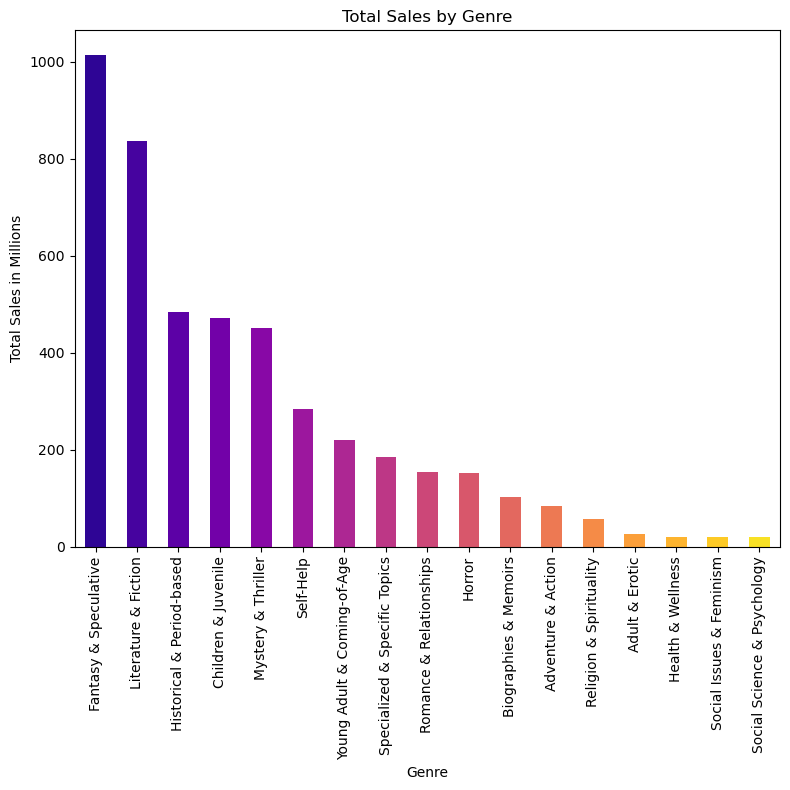

In [26]:
sales_by_genre = cleaned_data.groupby('Genre')['Approximate sales in millions'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 8))
colors = sns.color_palette('plasma', len(sales_by_genre))
sales_by_genre.plot(kind='bar', color=colors)
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales in Millions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [29]:
anova = f_oneway(*[cleaned_data['Approximate sales in millions'][cleaned_data['Genre'] == genre] for genre in cleaned_data['Genre'].unique()])
anova


F_onewayResult(statistic=0.8575209663461674, pvalue=0.6184609250870933)

In [30]:
print("The ANOVA results indicate that, at the tested significance level, there isn't sufficient evidence to conclude significant differences between book sales based on genre.")

The ANOVA results indicate that, at the tested significance level, there isn't sufficient evidence to conclude significant differences between book sales based on genre.
